In [1]:
library(ArchR)
set.seed(1)
addArchRThreads(threads = 1)
addArchRGenome("mm10")
library(tidyverse)
library(here)
library(Seurat)
library(gt)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene
library(clusterProfiler)
library(ReactomePA)
library(DOSE)
#plot track
library(scATACutils)
library(dplyr)
library(readr)
library(ggplot2)
library(org.Mm.eg.db)
library(ggpubr)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

ERROR: Error in library(gt): there is no package called ‘gt’


# Loading data like so

In [3]:
h5closeAll()
h5disableFileLocking()

In [4]:
Merged.proj2 <- readRDS(file= "./Germ_cell_subset_4sample/Save-ArchR-Project.rds")
Merged.proj2@sampleColData$ArrowFiles <- c("./Germ_cell_subset_4sample//ArrowFiles/TP15.arrow",
                                          "./Germ_cell_subset_4sample//ArrowFiles/TP12.arrow",
                                          "./Germ_cell_subset_4sample//ArrowFiles/TP13.arrow",
                                          "./Germ_cell_subset_4sample//ArrowFiles/TP14.arrow")
Merged.proj2@projectMetadata$outputDirectory <- "/lustre/home/jasonliao/teaching_server/sex_differentiation/Germ_cell_subset_4sample"
Merged.proj2
getAvailableMatrices(Merged.proj2)

Merged.proj2 <- addImputeWeights(Merged.proj2,k=15,ka=4,td=3,sampleCells = 5000,reducedDims = "IterativeLSI")


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /lustre/home/jasonliao/teaching_server/sex_differentiation/Germ_cell_subset_4sample 
samples(4): TP15 TP12 TP13 TP14
sampleColData names(1): ArrowFiles
cellColData names(55): Sample TSSEnrichment ... predictedGroup_Un
  predictedScore_Un
numberOfCells(1): 653
medianTSS(1): 15.194
medianFrags(1): 16042

[1] "GeneIntegrationMatrix" "GeneScoreMatrix"       "MotifMatrix"          
[4] "PeakMatrix"            "TileMatrix"

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-322655ec37a5-Date-2022-10-23_Time-02-55-38.log
If there is an issue, please report to github with logFile!

2022-10-23 02:55:39 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [3]:
Merged.proj2


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /lustre/home/jasonliao/teaching_server/sex_differentiation/Germ_cell_subset_4sample 
samples(4): TP15 TP12 TP13 TP14
sampleColData names(1): ArrowFiles
cellColData names(55): Sample TSSEnrichment ... predictedGroup_Un
  predictedScore_Un
numberOfCells(1): 653
medianTSS(1): 15.194
medianFrags(1): 16042

In [56]:
plotPDF(p.2[[1]], name = "female.germ.traj.UMAP.pdf", 
        width = 5, height = 5)

Plotting Ggplot!



In [99]:
p <-plotEmbedding(ArchRProj = Merged.proj2,embedding = "UMAP", colorBy ="cellColData", 
              name = c("predictedGroup_Un","cluster"
#                        "chrY", "cluster", "Sample", 
                      ),
              keepAxis = FALSE,
              plotAs = "points",
                 quantCut = c(0, 0.95),
                          size=4,
       baseSize = 20)
pdf("./2022Figure/Germ.umap.updated.pdf")
p
dev.off()

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3b5b5a88177f-Date-2022-03-25_Time-13-41-40.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 

2 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3b5b5a88177f-Date-2022-03-25_Time-13-41-40.log



$predictedGroup_Un

$cluster


png 
  2

In [100]:
timepal <- paletteDiscrete(values = c("TP12", "TP14", "TP15", "TP13"), set = "kelly", reverse = TRUE)

p <- plotEmbedding(ArchRProj = Merged.proj2,embedding = "UMAP", colorBy ="cellColData", 
              name = c("Sample"),
              keepAxis = FALSE,
              plotAs = "points",
                 quantCut = c(0, 0.95),
              pal = timepal,
              size=4,
       baseSize = 20)

pdf("./2022Figure/Germ.umap.updated.with.time.pdf")
p
dev.off()


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3b5b1a461c27-Date-2022-03-25_Time-13-41-56.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3b5b1a461c27-Date-2022-03-25_Time-13-41-56.log



png 
  2

## integrate with RNA-seq data

In [30]:
seRNA <- readRDS("./10.1.Gonad_germcell_subset_RNA.rds")


In [ ]:
# If merge blood cell
Idents(seRNA) <- seRNA@meta.data$celltype
seRNA <- RenameIdents(seRNA,"Neutrophils" = "Blood","Macrophages" = "Blood")
seRNA@meta.data$celltype2 <- Idents(seRNA)
# all.markers.raw <- FindAllMarkers(object = seRNA,logfc.threshold = 0.5,min.pct =0.3)

# DefaultAssay(seRNA) <- "RNA"
# options(repr.plot.height=20,repr.plot.width=20)
# top15 <- all.markers.raw %>% group_by(cluster) %>% top_n(n = 15, wt = avg_logFC)
# # integrated <- ScaleData(integrated, verbose = FALSE)
# DoHeatmap(seRNA, features = top15$gene) + NoLegend()

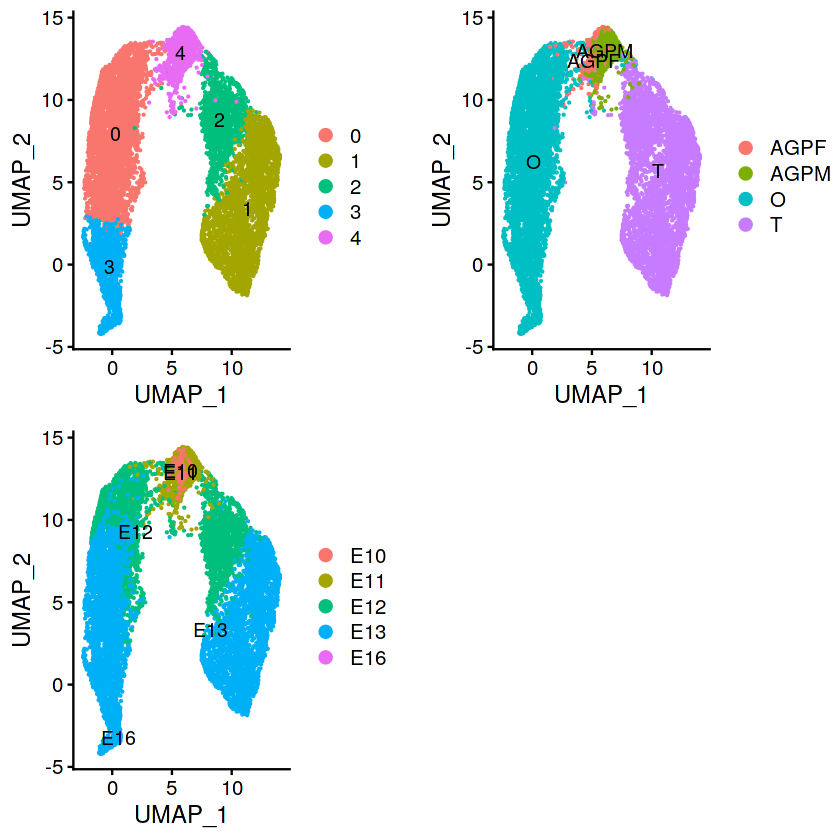

In [11]:
DimPlot(seRNA, reduction = "umap",group.by = c("seurat_clusters","tissue","time"), label = TRUE)

In [12]:
## Integration without harmony 
Merged.proj2 <- addGeneIntegrationMatrix(
    ArchRProj = Merged.proj2, 
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix",
    reducedDims = "IterativeLSI",
    seRNA = seRNA,
    addToArrow = TRUE,
    groupRNA = "seurat_clusters",
    nameCell = "predictedCell_Un",
    nameGroup = "predictedGroup_Un",
    nameScore = "predictedScore_Un",
    force = TRUE
)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-3b5b74639e56-Date-2021-04-11_Time-11-32-36.log
If there is an issue, please report to github with logFile!

2021-04-11 11:32:36 : Running Seurat's Integration Stuart* et al 2019, 0.003 mins elapsed.

2021-04-11 11:32:36 : Checking ATAC Input, 0.004 mins elapsed.

2021-04-11 11:32:36 : Checking RNA Input, 0.004 mins elapsed.

2021-04-11 11:32:43 : Found 16473 overlapping gene names from gene scores and rna matrix!, 0.121 mins elapsed.

2021-04-11 11:32:43 : Creating Integration Blocks, 0.121 mins elapsed.

2021-04-11 11:32:43 : Prepping Interation Data, 0.122 mins elapsed.

Filtering 22 dims correlated > 0.75 to log10(depth + 1)

2021-04-11 11:32:44 : Computing Integration in 1 Integration Blocks!, 0 mins elapsed.

2021-04-11 11:32:44 : Block (1 of 1) : Computing Integration, 0 mins elapsed.

2021-04-11 11:32:48 : Block (1 of 1) : Identifying Variable Genes, 0.067 mins elapsed.

2021-04-11 11:33:02 : Block (1 of 1) : Getting Ge

0         1         2         3         4 
"#D51F26" "#272E6A" "#208A42" "#89288F" "#F47D2B"

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3b5b7256e135-Date-2021-04-11_Time-11-39-11.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3b5b7256e135-Date-2021-04-11_Time-11-39-11.log



$predictedGroup_Un

$Sample


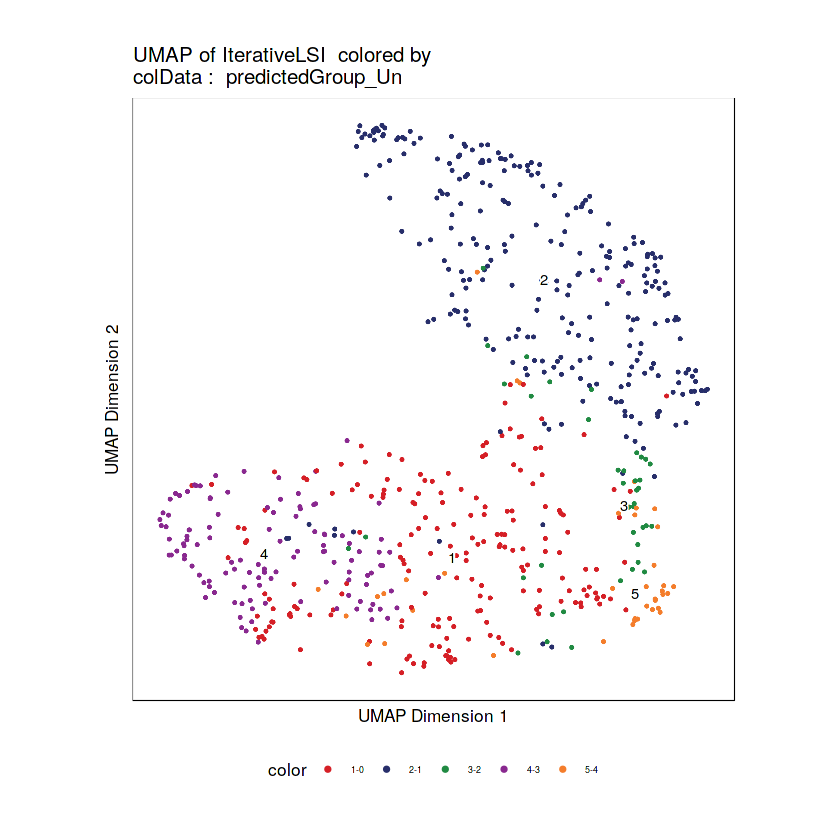

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3b5b25867199-Date-2021-04-11_Time-11-39-14.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3b5b25867199-Date-2021-04-11_Time-11-39-14.log



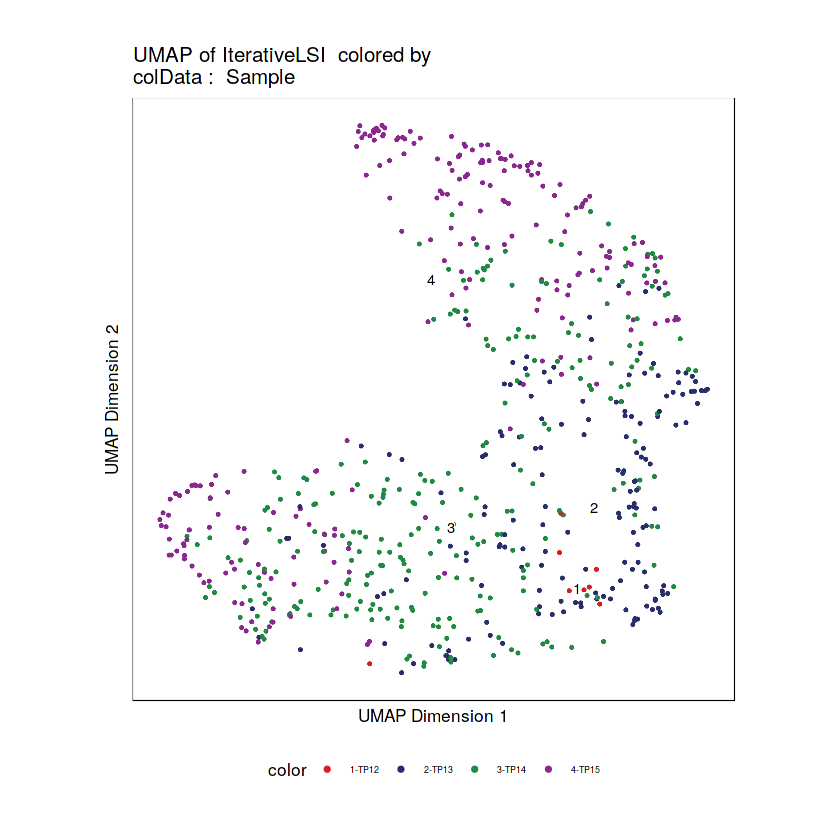

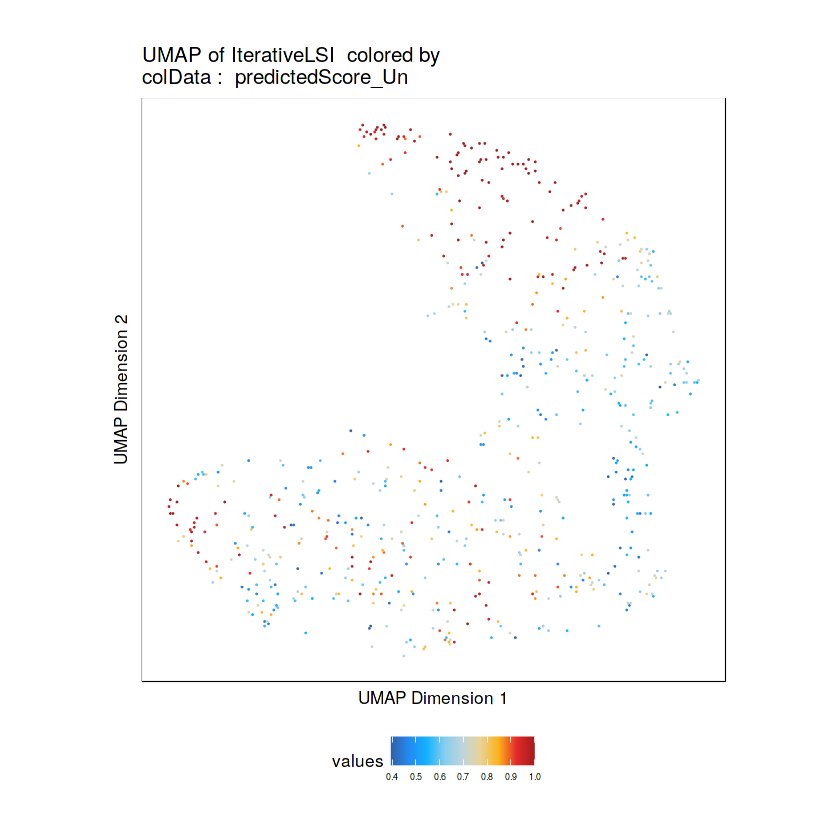

In [20]:
pal <- paletteDiscrete(values = seRNA$seurat_clusters)
pal
p1 <- plotEmbedding(
    Merged.proj2, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = c("predictedGroup_Un","Sample"),
    pal = pal,
    size=1
)
p1
p2 <- plotEmbedding(
    Merged.proj2, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = c("predictedScore_Un"),
#     pal = pal
)
p2

In [21]:
saveRDS(Merged.proj2,file= "./Germ_cell_subset_4sample/Save-ArchR-Project.rds")

##  Comparison of different clusters


### Find markers (GS)

In [7]:
markersGS <- getMarkerFeatures(
    ArchRProj = Merged.proj2, 
    useMatrix = "GeneScoreMatrix", 
    maxCells = 5000,
    groupBy = "cluster",
    k=200,
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-7abd6d9c5b54-Date-2021-03-26_Time-11-57-10.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2021-03-26 11:57:10 : Matching Known Biases, 0.003 mins elapsed.

2021-03-26 11:57:11 : Computing Pairwise Tests (1 of 5), 0.016 mins elapsed.

Pairwise Test 1 : Seqnames chr1

Pairwise Test 1 : Seqnames chr10

Pairwise Test 1 : Seqnames chr11

Pairwise Test 1 : Seqnames chr12

Pairwise Test 1 : Seqnames chr13

Pairwise Test 1 : Seqnames chr14

Pairwise Test 1 : Seqnames chr15

Pairwise Test 1 : Seqnames chr16

Pairwise Test 1 : Seqnames chr17

Pairwise Test 1 : Seqnames chr18

Pairwise Test 1 : Seqnames chr19

Pairwise Test 1 : Seqnames chr2

Pairwise Test 1 : Seqnames chr3

Pairwise Test 1 : Seqnames chr4

Pairwise Test 1 : Seqnames chr5

Pairwise Test 1 : Seqnames chr6

Pairwise Test 1 : Seqnames chr7

Pairwise Test 1 : Seqnames chr8

Pairwise Test 1 : Seqnames chr9

Pairwise Test 1 : Seqn

In [27]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.1 & Log2FC >= 0")

In [52]:
C4.marker <- markerList$"6"$name

In [53]:
C4.marker

[1] "Col1a1"        "Hoxa3"         "Hoxaas3"       "Ror2"         
  [5] "Hoxb3"         "Gm11544"       "Tbx3"          "Nfix"         
  [9] "Meis2"         "Col6a3"        "Hoxaas2"       "Rbms3"        
 [13] "Hoxa4"         "Adgra2"        "Cacna1g"       "Pdzrn3"       
 [17] "Hoxb5"         "AU015791"      "Pdgfrb"        "Hoxb2"        
 [21] "Antxr1"        "Lrp1"          "Atf6b"         "Carmn"        
 [25] "Mfap4"         "Ccdc42"        "4930503F20Rik" "Arap1"        
 [29] "Hoxa2"         "Mest"          "Sult5a1"       "Crocc2"       
 [33] "Meox1"         "Mir6346"       "I730028E13Rik" "2810442N19Rik"
 [37] "Cntfr"         "Hoxb5os"       "Ror1"          "Ddr2"         
 [41] "Col8a2"        "Mir143"        "Mrc2"          "Olfml3"       
 [45] "Twist2"        "Itga11"        "Col26a1"       "Cd248"        
 [49] "Hoxb4"         "Mir10a"        "Kcnk7"         "Upk3bl"       
 [53] "Hoxa6"         "Tmem132cos"    "Mira"          "S100a4"       
 [57] "6030471H07Rik" "Mir5624"       "Rhoj"          "Hoxa5"        
 [61] "Hoxa1"         "Gm16159"       "S100a5"        "Cpa1"         
 [65] "D830013O20Rik" "Col1a2"        "Des"           "Sh3rf1"       
 [69] "Dlg4"          "Emp1"          "Tmem132c"      "Gm4632"       
 [73] "Tbxa2r"        "Cd180"         "2010009K17Rik" "Rnf216"       
 [77] "Hoxc4"         "Gm15050"       "Fstl1"         "Loxl1"        
 [81] "Pus7l"         "Afap1l2"       "Rarg"          "AW549542"     
 [85] "Itga8"         "Mrpl23"        "Hlf"           "Hoxa7"        
 [89] "Mir335"        "Defb25"        "Thbs3"         "Nepro"        
 [93] "Firre"         "AI464131"      "Mlph"          "Mir701"       
 [97] "Gm266"         "Rcn3"          "Gm16063"       "Mirlet7i"     
[101] "Mir7651"       "Rassf2"        "Gm5860"        "Mrvi1"        
[105] "Gm16336"       "6330403K07Rik" "Lgi4"          "Sh3pxd2b"     
[109] "Slc6a17"       "Mir7014"       "Gm7538"        "Rnf165"       
[113] "Fxyd7"         "Mir148b"       "Col4a6"        "A930012L18Rik"
[117] "Hotairm1"      "Adamts6"       "4930500F04Rik" "1700022H16Rik"
[121] "Mtx1"          "Rbp1"          "Ptpra"         "Kdm6a"        
[125] "1700001D01Rik" "Islr"          "Tgfb2"         "Pgm5"         
[129] "Ifitm2"        "Aqp8"          "4933412O06Rik" "D630045J12Rik"
[133] "Bax"           "Dbh"           "Gpr84"         "Rasgrp2"      
[137] "Ggta1"         "2310043M15Rik" "Il33"          "Tmem204"      
[141] "Hoxb7"         "3110015C05Rik" "Hpca"          "Ptgis"        
[145] "Mir6715"       "Ifitm5"        "Efnb3"         "Hectd2os"     
[149] "Mapk15"        "D630033O11Rik" "5730409E04Rik" "4930431F12Rik"
[153] "Chrna1os"      "Ifi44l"        "Gm11627"       "4931403E22Rik"
[157] "1600027J07Rik" "Med24"         "Selenow"       "Setd7"        
[161] "Gm8787"        "Trpv1"         "9530026F06Rik" "Slc8b1"       
[165] "C230079O03Rik" "Bcas3os2"      "Slc22a21"      "Has2os"       
[169] "Lpcat2"        "Apoh"          "Twist1"        "Nasp"         
[173] "E130304I02Rik" "Hoxb6"         "Anpep"         "Tnnt3"        
[177] "4932441J04Rik" "Gm10248"       "9430014N10Rik" "Samd14"       
[181] "Nme4"          "Serping1"      "Gm16287"       "9430069I07Rik"
[185] "Mdfic"         "Cdh11"         "Stx1b"         "Map3k7cl"     
[189] "Alx1"          "Sparcl1"       "Gm16982"       "Fmo6"         
[193] "Itpripl2"      "Rnf113a2"      "Cdc6"          "Slc22a2"      
[197] "Gpn1"          "Rbm25"         "Ntrk1"         "Mmp2"         
[201] "Gm29684"       "1700003E16Rik" "Col7a1"        "Mir1954"      
[205] "Pinc"          "Abcd2"         "Rnf133"        "Zfp811"       
[209] "BC048562"      "Colec11"       "Praf2"         "Ppp1r3b"      
[213] "Eng"           "Fam217b"       "Hilpda"        "Rbm12b2"      
[217] "Khdc1b"        "Zc2hc1b"       "Olfr965"       "Mir3095"      
[221] "1700042O10Rik" "Mir1907"       "Hoxc5"         "Gm15412"      
[225] "Serpina3g"     "Gm11541"       "Chchd2"        "1700031M16Rik"
[229] "Shisa

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-24b315a440be-Date-2021-05-20_Time-15-52-13.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneIntegrationMatrix

Getting Matrix Values...

2021-05-20 15:52:14 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-24b315a440be-Date-2021-05-20_Time-15-52-13.log



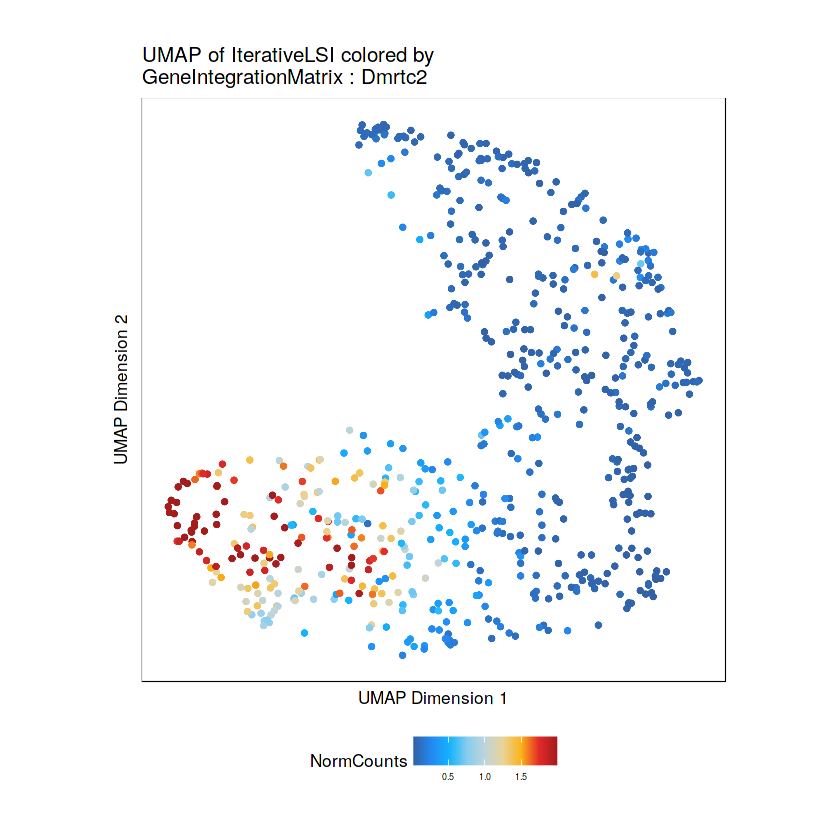

In [48]:
p <- plotEmbedding(
    ArchRProj = Merged.proj2, 
    colorBy = "GeneIntegrationMatrix", 
    name = c("Dmrtc2"), 
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(Merged.proj2),
    plotAs = "point",
    size =2 
)
p

In [52]:
saveRDS(markersGS,file="Germ.Clusters.markersGS.rds")

In [23]:
heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5", 
#  labelMarkers = umap.marker,

  transpose = TRUE,
#     plotLog2FC = TRUE
)

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-7abd2014d351-Date-2021-03-26_Time-12-02-39.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

1:

	Gm10538, Fcgr4, Lefty2, Pycr2, Lefty1, Mir1929, Nodal, Fam241b, Mir7662, Mob3a, Gm12216, Ntn1, Lhx1os, 1700109G15Rik, Wfikkn2

2:

	Vdac3, Hprt, AW822252, 4933407K13Rik, Efnb1, Myo1b, Mgat5, Srgap2, Gm10538, Ube2t, Fcgr4, Lefty2, Pycr2, Lefty1, Mir1929

3:

	Srgap2, Ube2t, Onecut3, Plekhj1, Myh10, Dlx4, Rpl19, Gga3, Bahcc1, 2900052L18Rik, Narf, Mpp5, Homer1, Map3k12, Tarbp2

4:

	Myo1b, Mgat5, Csrp2, Drg1, Akr1c13, Otx2, Ncald, Mapk4, D730045A05Rik, Mir3085, Olfr1084, Macrod2, Gm6300, Slc7a12, Tbl1xr1

5:

	Zfa-ps, Pcdh15, Mir5627, Zfp953, Osgep, Mefv, Pou1f1, Slc5a3, Vmn2r113, Srpk1, Creb3l4, Slc39a1, Grid2, Figla, Vmn2r24

Identified 172 markers!



 [1] "Gm10538"       "Fcgr4"         "Lefty2"        "Pycr2"        
 [5] "Lefty1"        "Mir1929"       "Nodal"         "Fam241b"      
 [9] "Mir7662"       "Mob3a"         "Gm12216"       "Ntn1"         
[13] "Lhx1os"        "1700109G15Rik" "Wfikkn2"       "Vdac3"        
[17] "Hprt"          "AW822252"      "4933407K13Rik" "Efnb1"        
[21] "Myo1b"         "Mgat5"         "Srgap2"        "Ube2t"        
[25] "Onecut3"       "Plekhj1"       "Myh10"         "Dlx4"         
[29] "Rpl19"         "Gga3"          "Bahcc1"        "2900052L18Rik"
[33] "Narf"          "Mpp5"          "Homer1"        "Map3k12"      
[37] "Tarbp2"        "Csrp2"         "Drg1"          "Akr1c13"      
[41] "Otx2"          "Ncald"         "Mapk4"         "D730045A05Rik"
[45] "Mir3085"       "Olfr1084"      "Macrod2"       "Gm6300"       
[49] "Slc7a12"       "Tbl1xr1"       "Zfa-ps"        "Pcdh15"       
[53] "Mir5627"       "Zfp953"        "Osgep"         "Mefv"         
[57] "Pou1f1"        "Slc5a3"     

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-7abd2014d351-Date-2021-03-26_Time-12-02-39.log



# Trajectory analysis

In [6]:
# Major male
Major.trajectory <- c("4", "2", "1")
Merged.proj2 <- addTrajectory(
     ArchRProj = Merged.proj2, 
     name = "Major_trajectory", 
     groupBy = "predictedGroup_Un",
     trajectory = Major.trajectory, 
     embedding = "UMAP", 
     force = TRUE
 )

# Minor female
Minor.trajectory <- c("4","0","3")
Merged.proj2 <- addTrajectory(
   ArchRProj = Merged.proj2, 
   name = "Minor_trajectory", 
   groupBy = "predictedGroup_Un",
   trajectory = Minor.trajectory, 
   embedding = "UMAP", 
  force = TRUE
)

ArchR logging to : ArchRLogs/ArchR-addTrajectory-3b5b6f7c79d6-Date-2022-03-25_Time-10-49-51.log
If there is an issue, please report to github with logFile!

Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-3b5b6f7c79d6-Date-2022-03-25_Time-10-49-51.log

ArchR logging to : ArchRLogs/ArchR-addTrajectory-3b5b3201060a-Date-2022-03-25_Time-10-49-51.log
If there is an issue, please report to github with logFile!

Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-3b5b3201060a-Date-2022-03-25_Time-10-49-51.log



ArchR logging to : ArchRLogs/ArchR-plotTrajectory-24b36f78f3dc-Date-2021-05-20_Time-15-56-56.log
If there is an issue, please report to github with logFile!

Plotting

Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-24b36f78f3dc-Date-2021-05-20_Time-15-56-56.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-24b3583fbcbc-Date-2021-05-20_Time-15-56-58.log
If there is an issue, please report to github with logFile!

Plotting

Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-24b3583fbcbc-Date-2021-05-20_Time-15-56-58.log



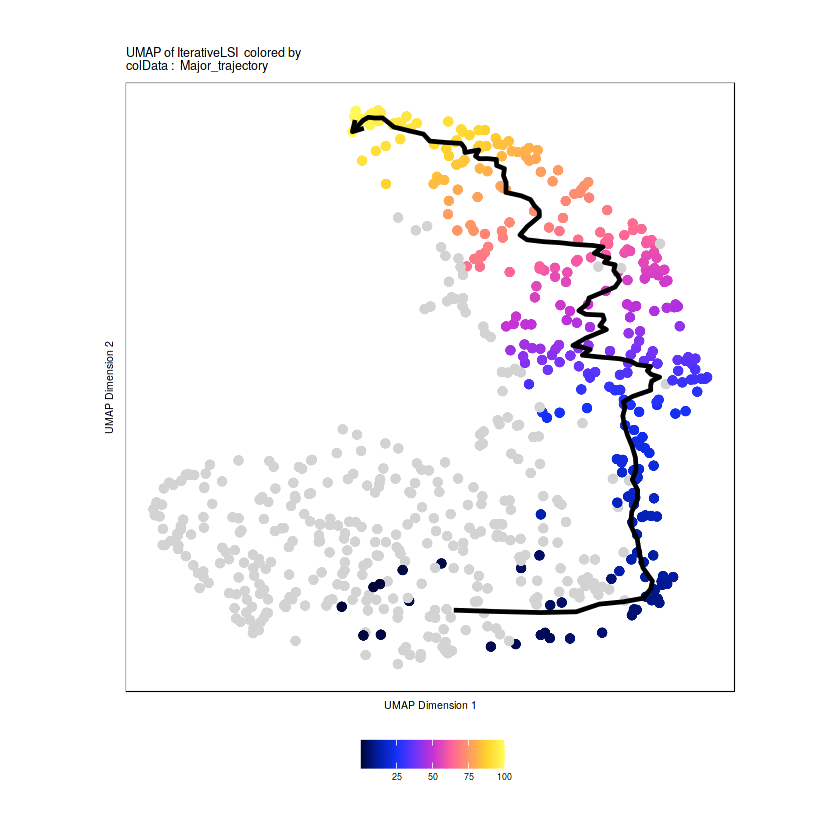

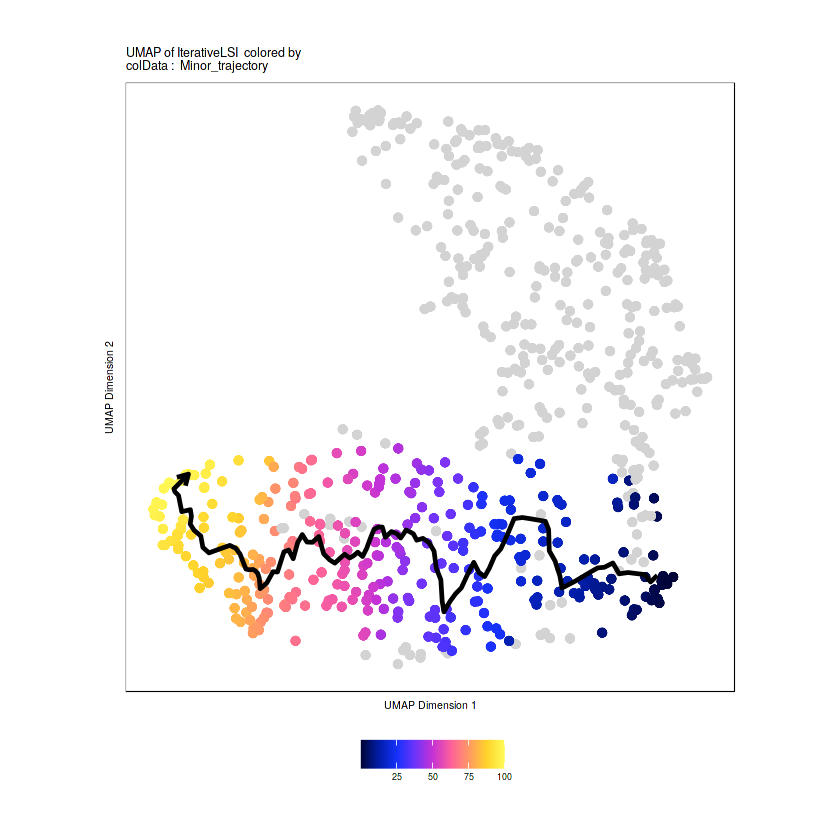

In [55]:
p <- plotTrajectory(Merged.proj2, trajectory = "Major_trajectory", size = 3, plotAs = "points", colorBy = "cellColData", name = "Major_trajectory")
p[[1]]
p.2 <- plotTrajectory(Merged.proj2, trajectory = "Minor_trajectory", size = 3, plotAs = "points", colorBy = "cellColData", name = "Minor_trajectory")
p.2[[1]]


Creating Trajectory Group Matrix..

Some values are below 0, this could be a DeviationsMatrix in which scaleTo should be set = NULL.
Continuing without depth normalization!

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b34757c796-Date-2021-05-20_Time-15-42-45.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2021-05-20 15:42:45 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2021-05-20 15:42:45 : 

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b34757c796-Date-2021-05-20_Time-15-42-45.log



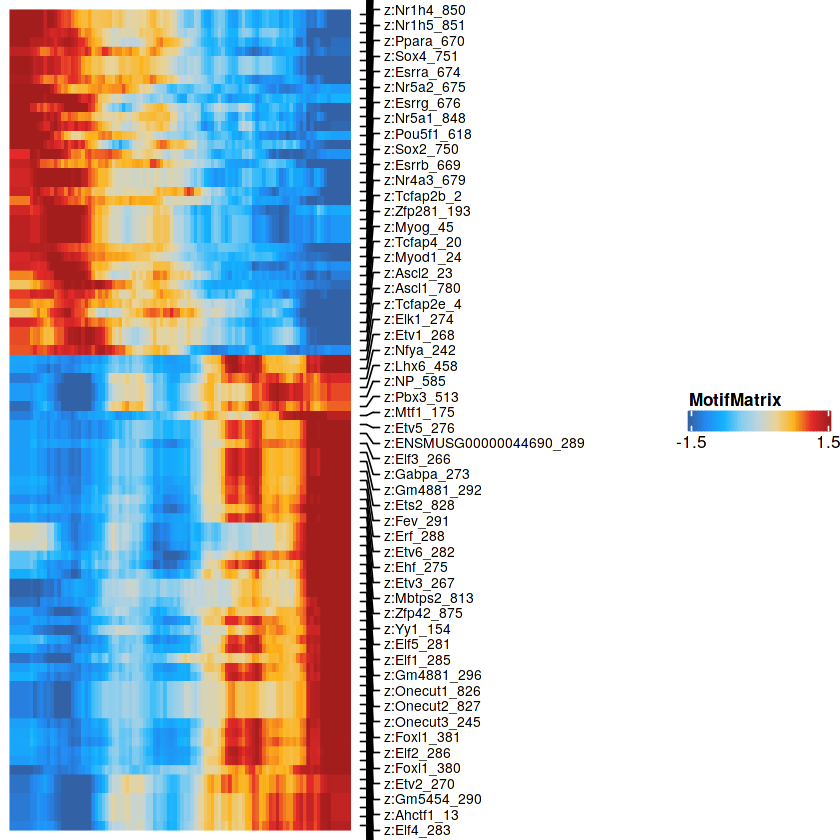

In [39]:
trajMM  <- getTrajectory(ArchRProj = Merged.proj2, name = "Minor_trajectory", useMatrix = "MotifMatrix", log2Norm = FALSE)
p1 <- plotTrajectoryHeatmap(trajMM, pal = paletteContinuous(set = "solarExtra"),labelTop = 100)
p1

Creating Trajectory Group Matrix..

Smoothing...

Warning message:
“'trajectoryHeatmap' is deprecated.
Use 'plotTrajectoryHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b33a629aeb-Date-2021-05-20_Time-15-24-25.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b33a629aeb-Date-2021-05-20_Time-15-24-25.log



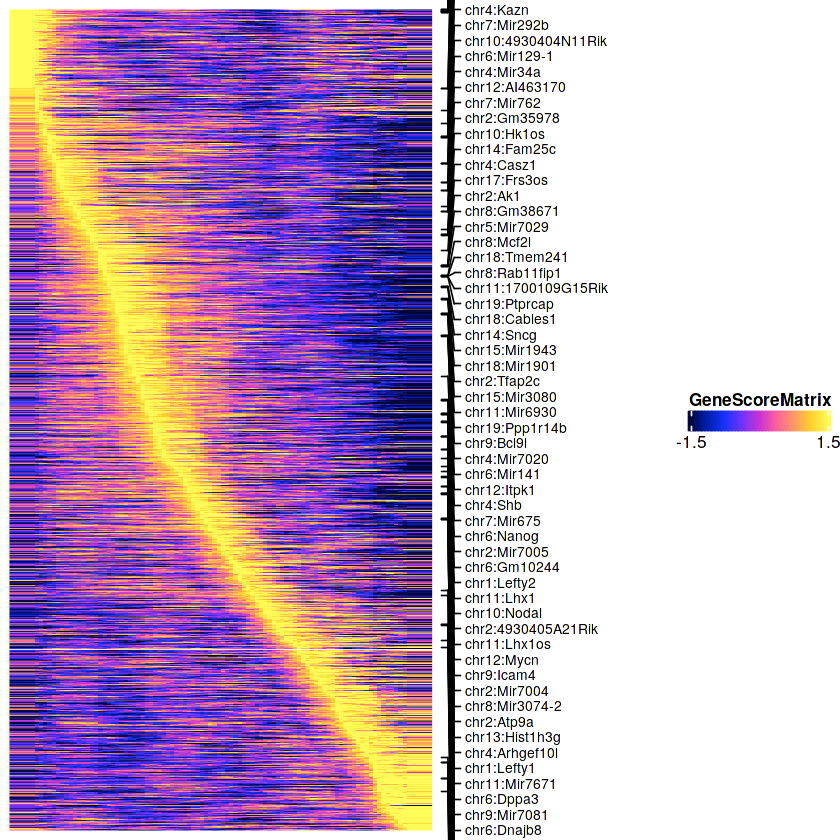

In [27]:
trajGSM <- getTrajectory(ArchRProj = Merged.proj2, name = "Major_trajectory", useMatrix = "GeneScoreMatrix", log2Norm = TRUE)
p2 <- trajectoryHeatmap(trajGSM,  pal = paletteContinuous(set = "horizonExtra"),labelTop = 100)
p2

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b31b59cc0-Date-2021-05-20_Time-15-43-13.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b31b59cc0-Date-2021-05-20_Time-15-43-13.log



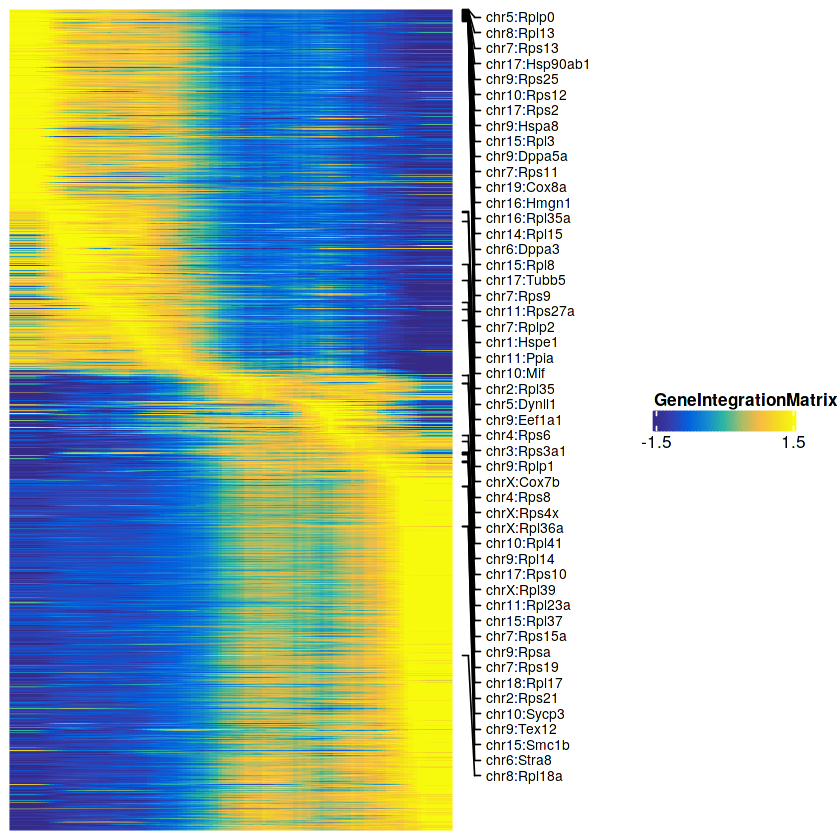

In [40]:
trajGIM <- getTrajectory(ArchRProj = Merged.proj2, name = "Minor_trajectory", useMatrix = "GeneIntegrationMatrix", log2Norm = FALSE)
p3 <- plotTrajectoryHeatmap(trajGIM,  pal = paletteContinuous(set = "blueYellow"))
p3

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-24b33a215898-Date-2021-05-20_Time-15-43-15.log
If there is an issue, please report to github with logFile!

Found 60 Correlated Pairings!

2021-05-20 15:43:25 : 



DataFrame with 60 rows and 12 columns
         idx1      idx2 matchname1 matchname2        name1         name2
    <integer> <integer>    <array>    <array>  <character>   <character>
1          19      1531      Mybl1      Mybl1   chr1:Mybl1   z:Mybl1_647
2         634      1559      Nr5a2      Nr5a2   chr1:Nr5a2   z:Nr5a2_675
3        1763      1037      Patz1      Patz1  chr11:Patz1   z:Patz1_153
4        2245      1576      Trp53      Trp53  chr11:Trp53   z:Trp53_692
5        2250      1621      Sox15      Sox15  chr11:Sox15   z:Sox15_737
...       ...       ...        ...        ...          ...           ...
56      15533      1139      Tfdp2      Tfdp2   chr9:Tfdp2   z:Tfdp2_255
57      15690      1727    Smarcc1    Smarcc1 chr9:Smarcc1 z:Smarcc1_843
58      15795      1102     Zfp105     Zfp105  chr9:Zfp105  z:Zfp105_218
59      15946      1296      Rhox6      Rhox6   chrX:Rhox6   z:Rhox6_412
60      15949      1456      Rhox9      Rhox9   chrX:Rhox9   z:Rhox9_572
          Cor

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b36d9edc73-Date-2021-05-20_Time-15-43-25.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b36d9edc73-Date-2021-05-20_Time-15-43-25.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b352522831-Date-2021-05-20_Time-15-43-26.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b352522831-Date-2021-05-20_Time-15-43-26.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-24b32c031f52-Date-2021-05-20_Time-15-43-26.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2021-05-20 15:43:26 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2021-05-20 15:43:26 : 

Preparing Main Heatmap..

A

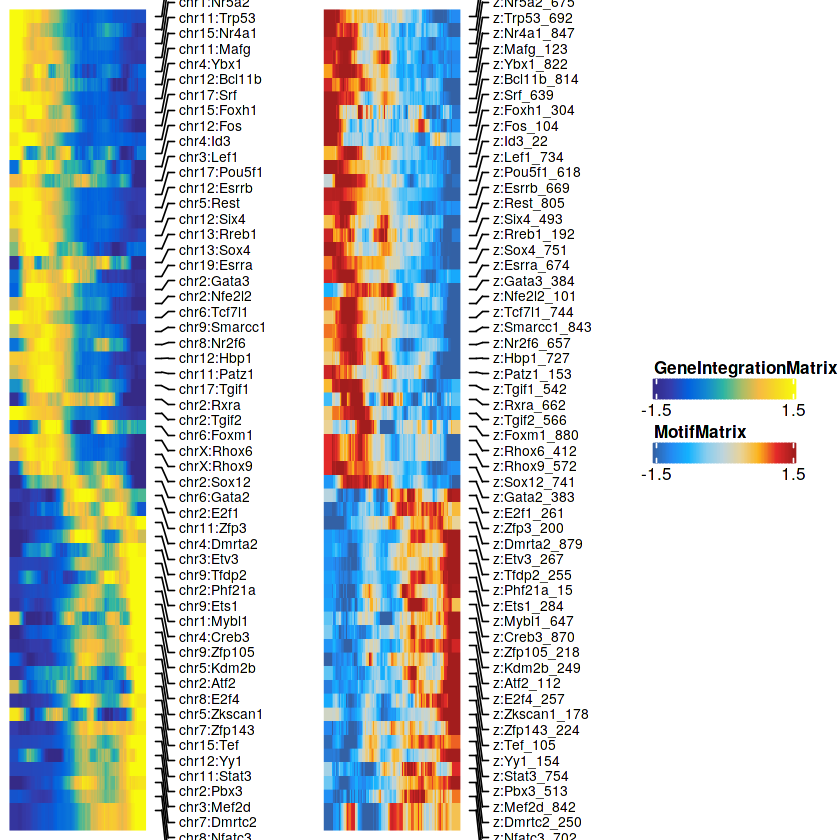

In [41]:
corGIM_MM <- correlateTrajectories(trajGIM, trajMM, corCutOff = 0.2,varCutOff1=0.5,varCutOff2=0.5)
corGIM_MM[[1]]
trajGIM2 <- trajGIM[corGIM_MM[[1]]$name1, ]
trajMM2 <- trajMM[corGIM_MM[[1]]$name2, ]

trajCombined <- trajGIM2
assay(trajCombined) <- t(apply(assay(trajGIM2), 1, scale)) + t(apply(assay(trajMM2), 1, scale))

combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)
rowOrder <- match(rownames(combinedMat), rownames(trajGIM2))

ht1 <- plotTrajectoryHeatmap(trajGIM2,  pal = paletteContinuous(set = "blueYellow"),  labelTop = 70, varCutOff = 0, rowOrder = rowOrder)
ht2 <- plotTrajectoryHeatmap(trajMM2, pal = paletteContinuous(set = "solarExtra"), labelTop = 70, varCutOff = 0, rowOrder = rowOrder)

ht1 + ht2

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-7abd42867dbb-Date-2021-03-26_Time-12-46-04.log
If there is an issue, please report to github with logFile!

Found 23 Correlated Pairings!

2021-03-26 12:46:19 : 

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-7abd1c974cd2-Date-2021-03-26_Time-12-46-19.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-7abd1c974cd2-Date-2021-03-26_Time-12-46-19.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-7abd115f1d51-Date-2021-03-26_Time-12-46-19.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-7abd115f1d51-Date-2021-03-26_Time-12-46-19.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-7abd37c2b028-Date-2021-03-26_Time-12-46-19.log
If there is an issue, please report to github with logFile!

u

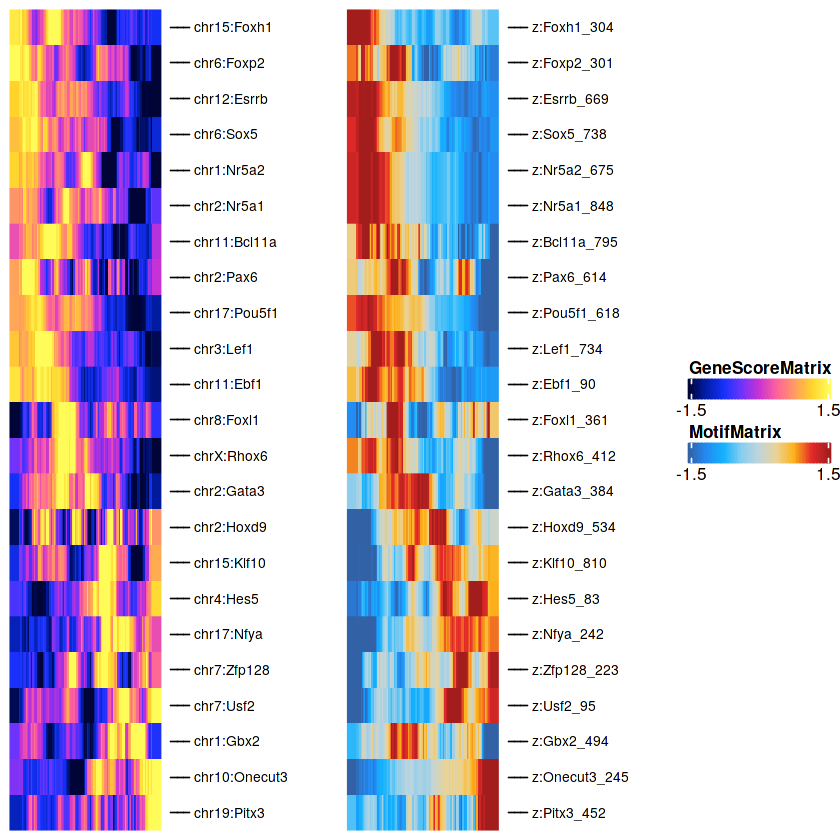

In [42]:
#integration
corGSM_MM <- correlateTrajectories(trajGSM, trajMM,corCutOff = 0.2,varCutOff1=0.5,varCutOff2=0.5)
trajGSM2 <- trajGSM[corGSM_MM[[1]]$name1, ]
trajMM2 <- trajMM[corGSM_MM[[1]]$name2, ]

trajCombined <- trajGSM2
assay(trajCombined) <- t(apply(assay(
    trajGSM2), 1, scale)) + t(apply(assay(trajMM2), 1, scale))

combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)
rowOrder <- match(rownames(combinedMat), rownames(trajGSM2))
ht1 <- plotTrajectoryHeatmap(trajGSM2,  pal = paletteContinuous(set = "horizonExtra"),  varCutOff = 0, rowOrder = rowOrder)
ht2 <- plotTrajectoryHeatmap(trajMM2, pal = paletteContinuous(set = "solarExtra"), varCutOff = 0, rowOrder = rowOrder)
ht1 + ht2

### 8. Co-accessibility analysis

In [7]:
Merged.proj2 <- addCoAccessibility(
    ArchRProj = Merged.proj2,
    reducedDims = "IterativeLSI"
)

cA <- getCoAccessibility(
    ArchRProj = Merged.proj2,
    corCutOff = 0.3,
    resolution = 1,
    returnLoops = TRUE
)

# Merged.proj2 <- addPeak2GeneLinks(
#     ArchRProj = Merged.proj2,
#     reducedDims = "IterativeLSI"
# )

Merged.proj2 <- addPeak2GeneLinks(
    ArchRProj = Merged.proj2,
    reducedDims = "IterativeLSI",
    predictionCutoff = 0,
    k = 5,
  knnIteration = 4000,
  overlapCutoff = 0.8,
)

p2g <- getPeak2GeneLinks(
    ArchRProj = Merged.proj2,
    corCutOff = 0.3,
    resolution = 1,
    returnLoops = TRUE
)
p2g.df <- getPeak2GeneLinks(
    ArchRProj = Merged.proj2,
    corCutOff = 0.3,
    resolution = 1,
    returnLoops = FALSE
)





ArchR logging to : ArchRLogs/ArchR-addCoAccessibility-32262325a4a3-Date-2022-10-23_Time-02-59-09.log
If there is an issue, please report to github with logFile!

Filtering 22 dims correlated > 0.75 to log10(depth + 1)

2022-10-23 02:59:10 : Computing KNN, 0.011 mins elapsed.

2022-10-23 02:59:10 : Identifying Non-Overlapping KNN pairs, 0.012 mins elapsed.

2022-10-23 02:59:12 : Identified 276 Groupings!, 0.051 mins elapsed.

2022-10-23 02:59:16 : Computing Co-Accessibility chr1 (1 of 21), 0.118 mins elapsed.

2022-10-23 02:59:20 : Computing Co-Accessibility chr2 (2 of 21), 0.188 mins elapsed.

2022-10-23 02:59:26 : Computing Co-Accessibility chr3 (3 of 21), 0.276 mins elapsed.

2022-10-23 02:59:29 : Computing Co-Accessibility chr4 (4 of 21), 0.332 mins elapsed.

2022-10-23 02:59:35 : Computing Co-Accessibility chr5 (5 of 21), 0.43 mins elapsed.

2022-10-23 02:59:41 : Computing Co-Accessibility chr6 (6 of 21), 0.524 mins elapsed.

2022-10-23 02:59:46 : Computing Co-Accessibility chr7 (7

Completed Computing KNN Overlap 500 of 4000
Completed Computing KNN Overlap 1000 of 4000
Completed Computing KNN Overlap 1500 of 4000
Completed Computing KNN Overlap 2000 of 4000
Completed Computing KNN Overlap 2500 of 4000
Completed Computing KNN Overlap 3000 of 4000
Completed Computing KNN Overlap 3500 of 4000


2022-10-23 03:01:01 : Identified 624 Groupings!, 0.061 mins elapsed.

2022-10-23 03:01:01 : Getting Group RNA Matrix, 0.062 mins elapsed.

2022-10-23 03:01:54 : Getting Group ATAC Matrix, 0.932 mins elapsed.

2022-10-23 03:02:56 : Normalizing Group Matrices, 1.964 mins elapsed.

2022-10-23 03:03:01 : Finding Peak Gene Pairings, 2.062 mins elapsed.

2022-10-23 03:03:02 : Computing Correlations, 2.072 mins elapsed.

2022-10-23 03:03:08 : Completed Peak2Gene Correlations!, 2.173 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addPeak2GeneLinks-32262efa038f-Date-2022-10-23_Time-03-00-56.log



### Cicero analysis

In [10]:
library(cicero)
cA.df <- as.data.frame(cA[[1]])
conns <- cA.df %>% mutate(start1=start) %>% mutate(end1=start+1)%>% 
mutate(seqnames1=seqnames) %>% mutate(seqnames2=seqnames)%>% mutate(coaccess = value) %>%
mutate(start2=end) %>% mutate(end2=end+1) %>% 
dplyr::select(seqnames1,start1,end1,seqnames2,start2,end2,coaccess) %>%
unite(Peak1,seqnames1:end1,sep = "_",remove=TRUE) %>%
unite(Peak2,seqnames2:end2,sep = "_",remove=TRUE) 
CCAN_assigns <- generate_ccans(conns)

Loading required package: monocle

Loading required package: VGAM

Loading required package: splines


Attaching package: 'VGAM'


The following object is masked from 'package:tidyr':

    fill


Loading required package: DDRTree

Loading required package: irlba

Loading required package: Gviz

Loading required package: grid



[1] "Coaccessibility cutoff used: 0"


In [16]:
p2g.conns <- as.data.frame(p2g[[1]])%>% mutate(start1=start) %>% mutate(end1=start+1)%>% 
mutate(seqnames1=seqnames) %>% mutate(seqnames2=seqnames)%>% mutate(coaccess = value) %>%
mutate(start2=end) %>% mutate(end2=end+1) %>% 
dplyr::select(seqnames1,start1,end1,seqnames2,start2,end2,coaccess) %>%
unite(Peak1,seqnames1:end1,sep = "_",remove=TRUE) %>%
unite(Peak2,seqnames2:end2,sep = "_",remove=TRUE) 
p2g_CCAN_assigns <- generate_ccans(p2g.conns)

[1] "Coaccessibility cutoff used: 0"


In [33]:
# CCAN_assigns <- generate_ccans(conns,coaccess_cutoff_override = 0.25)
p2g_CCAN_assigns <- generate_ccans(p2g.conns,coaccess_cutoff_override = 0.5)

[1] "Coaccessibility cutoff used: 0.5"


In [34]:
topp2gCCAN <- p2g_CCAN_assigns %>% group_by(CCAN) %>% tally() %>% arrange(desc(n)) %>% head(n=100)
p2g_CCAN_assigns %>% filter(CCAN %in% topp2gCCAN$CCAN) %>% separate(Peak,c("chr","start","end"),sep = "_") %>%
write_tsv("Top100.p2gCCAN.bed")

In [ ]:
conns_start <- cA.df %>% mutate(seqnames1=seqnames) %>% mutate(start1=start-251) %>% mutate(end1=start+251)%>%
mutate(seqnames2=seqnames)%>% mutate(start2=end-251) %>% mutate(end2=end+251) %>% mutate(coaccess = value) %>%
unite(Peak1,seqnames1:end1,sep = "_",remove=FALSE) %>%
unite(Peak2,seqnames2:end2,sep = "_",remove=FALSE) %>% mutate(loopid = row.names(cA.df))%>% 
dplyr::select(seqnames1,start1,end1,seqnames2,start2,end2,coaccess,loopid) 

conns_end <- cA.df %>% mutate(seqnames1=seqnames) %>% mutate(start1=start-251) %>% mutate(end1=start+251)%>%
mutate(seqnames2=seqnames)%>% mutate(start2=end-251) %>% mutate(end2=end+251) %>% mutate(coaccess = value) %>%
unite(Peak1,seqnames1:end1,sep = "_",remove=FALSE) %>%
unite(Peak2,seqnames2:end2,sep = "_",remove=FALSE) %>% mutate(loopid = row.names(cA.df)) %>%
dplyr::select(seqnames2,start2,end2,seqnames1,start1,end1,coaccess,loopid) 

In [ ]:
library(GenomicRanges)
conns_start.gr <- makeGRangesFromDataFrame(conns_start,keep.extra.columns=TRUE,
                         ignore.strand=FALSE,
                         seqnames.field="seqnames1",start.field = "start1",end.field="end1")
conns_end.gr <- makeGRangesFromDataFrame(conns_end,keep.extra.columns=TRUE,
                         ignore.strand=FALSE,
                         seqnames.field="seqnames2",start.field = "start2",end.field="end2")
saveRDS(conns_start.gr,"EMT.conns_start.gr.rds")
saveRDS(conns_end.gr,"EMT.conns_end.gr.rds")

In [ ]:
topCCAN <- CCAN_assigns %>% group_by(CCAN) %>% tally() %>% arrange(desc(n)) %>% head(n=100)
CCAN_assigns %>% filter(CCAN %in% topCCAN$CCAN) %>% separate(Peak,c("chr","start","end"),sep = "_") %>%
write_tsv("Top100.CCAN.bed")

In [ ]:
top181CCAN <- CCAN_assigns %>% filter(CCAN %in% topCCAN$CCAN) %>% separate(Peak,c("chr","start","end"),sep = "_")
top181CCAN$start <-  as.numeric(top181CCAN$start)
top181CCAN$end <-  as.numeric(top181CCAN$end)
top181CCAN %>% mutate(seqnames1=chr) %>% mutate(start1=start-251) %>% mutate(end1=start+251)%>%
mutate(seqnames2=chr)%>% mutate(start2=end-251) %>% mutate(end2=end+251)  %>% 
dplyr::select(seqnames1,start1,end1,seqnames2,start2,end2) %>% write_tsv("top181CCAN.arcs")

In [362]:
# df=data.frame((p2g[[1]])) 
# df <- df %>% unite("peak1", seqnames:start,remove = FALSE, sep = "_") %>% unite("peak2", c(seqnames,end),remove = FALSE, sep = "_") 
# table(df$peak1) %>% as.data.frame() %>% arrange(desc(Freq)) 


In [ ]:
# check bigwig correlation using deeptools
#cd /home/leetl/Gonocyte/Raw_data/Gonocyte.4sample.merged/GroupBigWigs 
multiBigwigSummary bins -b ./Clusters/*.bw -o ./Clusters/results.npz
plotCorrelation \
    -in ./Clusters/results.npz \
    --corMethod spearman --skipZeros \
    --plotTitle "Spearman Correlation of Read Counts" \
    --whatToPlot heatmap --colorMap RdYlBu --plotNumbers \
    -o ./Clusters/heatmap_SpearmanCorr_readCounts.png   \
    --outFileCorMatrix ./Clusters/SpearmanCorr_readCounts.tab

In [407]:
# add a column of stage-specif annotation
Merged.proj2@cellColData$sample_celltype <- paste(Merged.proj2@cellColData$Sample,Merged.proj2@cellColData$predictedGroup_Co)

In [280]:
# p2g.mtx[[3]]$gene %>% table() %>% as.data.frame() %>% arrange(desc(Freq)) %>% head(n=100) %>% print()

In [195]:
# p2g.heatmap <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj2, corCutOff = 0.5,groupBy = "predictedGroup_Co",k = 6)
pdf(file="allcell.p2g.pdf",width=10,height=6)
p2g.heatmap
dev.off()

png 
  2

In [9]:
Merged.proj2 <- addPeak2GeneLinks(
    ArchRProj = Merged.proj2,
    reducedDims = "IterativeLSI",
    k = 50,
  knnIteration = 4000
)

ArchR logging to : ArchRLogs/ArchR-addPeak2GeneLinks-322668a97c25-Date-2022-10-23_Time-03-05-11.log
If there is an issue, please report to github with logFile!

2022-10-23 03:05:12 : Getting Available Matrices, 0.014 mins elapsed.

2022-10-23 03:05:12 : Filtered Low Prediction Score Cells (15 of 653, 0.023), 0.002 mins elapsed.

Filtering 22 dims correlated > 0.75 to log10(depth + 1)

2022-10-23 03:05:13 : Computing KNN, 0.009 mins elapsed.

2022-10-23 03:05:13 : Identifying Non-Overlapping KNN pairs, 0.011 mins elapsed.



Completed Computing KNN Overlap 500 of 4000
Completed Computing KNN Overlap 1000 of 4000
Completed Computing KNN Overlap 1500 of 4000
Completed Computing KNN Overlap 2000 of 4000
Completed Computing KNN Overlap 2500 of 4000
Completed Computing KNN Overlap 3000 of 4000
Completed Computing KNN Overlap 3500 of 4000


2022-10-23 03:05:43 : Identified 500 Groupings!, 0.508 mins elapsed.

2022-10-23 03:05:43 : Getting Group RNA Matrix, 0.51 mins elapsed.

2022-10-23 03:06:42 : Getting Group ATAC Matrix, 1.501 mins elapsed.

2022-10-23 03:07:50 : Normalizing Group Matrices, 2.63 mins elapsed.

2022-10-23 03:07:55 : Finding Peak Gene Pairings, 2.715 mins elapsed.

2022-10-23 03:07:56 : Computing Correlations, 2.725 mins elapsed.

2022-10-23 03:08:02 : Completed Peak2Gene Correlations!, 2.831 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addPeak2GeneLinks-322668a97c25-Date-2022-10-23_Time-03-05-11.log



In [19]:
p2g <- getPeak2GeneLinks(
    ArchRProj = Merged.proj2,
    corCutOff = 0.3,
    resolution = 1,
    returnLoops = TRUE
)
# p2g.df <- getPeak2GeneLinks(
#     ArchRProj = Merged.proj2,
#     corCutOff = 0.3,
#     resolution = 1,
#     returnLoops = FALSE
# )
p2g

List of length 1
names(1): Peak2GeneLinks

In [28]:
p2g[[1]]

GRanges object with 68134 ranges and 2 metadata columns:
          seqnames          ranges strand |     value          FDR
             <Rle>       <IRanges>  <Rle> | <numeric>    <numeric>
      [1]     chr1 4544283-4785726      * |  0.613137  2.51023e-51
      [2]     chr1 4571787-4785726      * |  0.520417  7.20711e-35
      [3]     chr1 4612136-4785726      * |  0.744733  6.25387e-87
      [4]     chr1 4612136-4857694      * |  0.427679  8.24308e-23
      [5]     chr1 4631670-4785726      * |  0.653734  2.05754e-60
      ...      ...             ...    ... .       ...          ...
  [68130]     chrY   809208-897788      * |  0.521659  4.67035e-35
  [68131]     chrY  809208-1010612      * |  0.691961  2.39421e-70
  [68132]     chrY   818631-818649      * |  0.789524 1.28681e-104
  [68133]     chrY   818631-897788      * |  0.781352 4.46460e-101
  [68134]     chrY  818631-1010612      * |  0.827419 2.32114e-123
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqleng

In [31]:
# p2g.mtx <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj2, corCutOff = 0.5,groupBy = "predictedGroup_Un",k = 6,returnMat=TRUE)

p2g.heatmap  <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj2, corCutOff = 0.5,
       FDRCutOff = 0.01,
                                     groupBy = "cluster",
#                                      groupBy = "predictedGroup_Un",
                                     k = 7,returnMat=FALSE)
p2g.mtx <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj2, corCutOff = 0.5,
       FDRCutOff = 0.01,
                                     groupBy = "cluster",
#                                      groupBy = "predictedGroup_Un",
                                     k = 7,returnMat=TRUE)


ArchR logging to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-3b5b2dd413d5-Date-2022-03-25_Time-12-24-28.log
If there is an issue, please report to github with logFile!

2022-03-25 12:24:31 : Determining KNN Groups!, 0.051 mins elapsed.

2022-03-25 12:24:34 : Ordering Peak2Gene Links!, 0.102 mins elapsed.



In [98]:
pdf(file="germ.p2g.using.original.cluster.pdf",width=8,height=6)
p2g.heatmap
dev.off()

png 
  2

In [41]:

p2g.heatmap.df %>% 
    dplyr::select(peak,gene,Correlation,FDR,VarQATAC,VarQRNA,cluster) %>%
    arrange(cluster) %>%
    write.table(file="allcell.p2g.heatmap.cluster.summary.txt",sep="\t",quote=FALSE,row.names = FALSE)


In [239]:
# Merged.proj2 <- addPeak2GeneLinks(
#     ArchRProj = Merged.proj2,
#     reducedDims = "Harmony"
# )
p2g.mtx <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj2, corCutOff = 0.5,groupBy = "predictedGroup_Un",k = 7,returnMat=TRUE)
saveRDS(p2g.mtx,file="germ.addp2g.rds")
p2g.heatmap.df <- p2g.mtx[[3]]@listData %>% as.data.frame %>% dplyr::mutate(cluster = p2g.mtx[[1]][[2]])
# p2g.heatmap.df %>% filter(cluster == "4")  %>% arrange(desc(VarQRNA)) 
# p2g.heatmap.df %>% filter(cluster == "2")  %>% arrange(desc(freq(gene))) 
# p2g.heatmap.df %>% filter(gene == "Lepr")

ArchR logging to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-24b36703daee-Date-2021-06-21_Time-15-33-01.log
If there is an issue, please report to github with logFile!

2021-06-21 15:33:05 : Determining KNN Groups!, 0.062 mins elapsed.

2021-06-21 15:33:07 : Ordering Peak2Gene Links!, 0.094 mins elapsed.



In [ ]:
### p2g list

In [33]:
p2g.df <- getPeak2GeneLinks(
    ArchRProj = Merged.proj2,
    corCutOff = 0.5,
    resolution = 1,
    FDRCutOff = 0.01,
    returnLoops = FALSE
)


p2g.heatmap.df <- p2g.mtx[[3]]@listData %>% as.data.frame %>% dplyr::mutate(cluster = p2g.mtx[[1]][[2]])


tss.peaks <- metadata(p2g.df)[[2]] %>% as.data.frame() %>% mutate(end = end +1)%>% 
mutate(gene = name) %>%
dplyr::select(gene,seqnames:end)
p2g.heatmap.addtss.df <- p2g.heatmap.df %>% inner_join(tss.peaks,by = "gene") 


library("writexl")
p2g.heatmap.addtss.df %>% write_xlsx("./2022Figure/germ.p2g.heatmap.7cluster.list.xlsx")
p2g.heatmap.addtss.df %>% write.csv("./2022Figure/germ.p2g.heatmap.7cluster.list.csv")





ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-322632d1e903-Date-2022-10-23_Time-03-14-33.log
If there is an issue, please report to github with logFile!

2022-10-23 03:14:34 : Validating Region, 0.013 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]    chr11 103774175-103818021      + |       22415        Wnt3
  -------
  seqinfo: 21 sequences from mm10 genome


2022-10-23 03:14:34 : Adding Bulk Tracks (1 of 1), 0.016 mins elapsed.

Getting Region From Arrow Files 1 of 4

Getting Region From Arrow Files 2 of 4

Getting Region From Arrow Files 3 of 4

Getting Region From Arrow Files 4 of 4

2022-10-23 03:14:36 : Adding Feature Tracks (1 of 1), 0.054 mins elapsed.

2022-10-23 03:14:36 : Adding Loop Tracks (1 of 1), 0.057 mins elapsed.

2022-10-23 03:14:37 : Adding Gene Tracks (1 of 1), 0.062 mins elapsed.

2022-10-23 03:14:37 : Plotting, 0.07 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-322632d1e903-Date-2022-10-23_Time-03-14-33.log



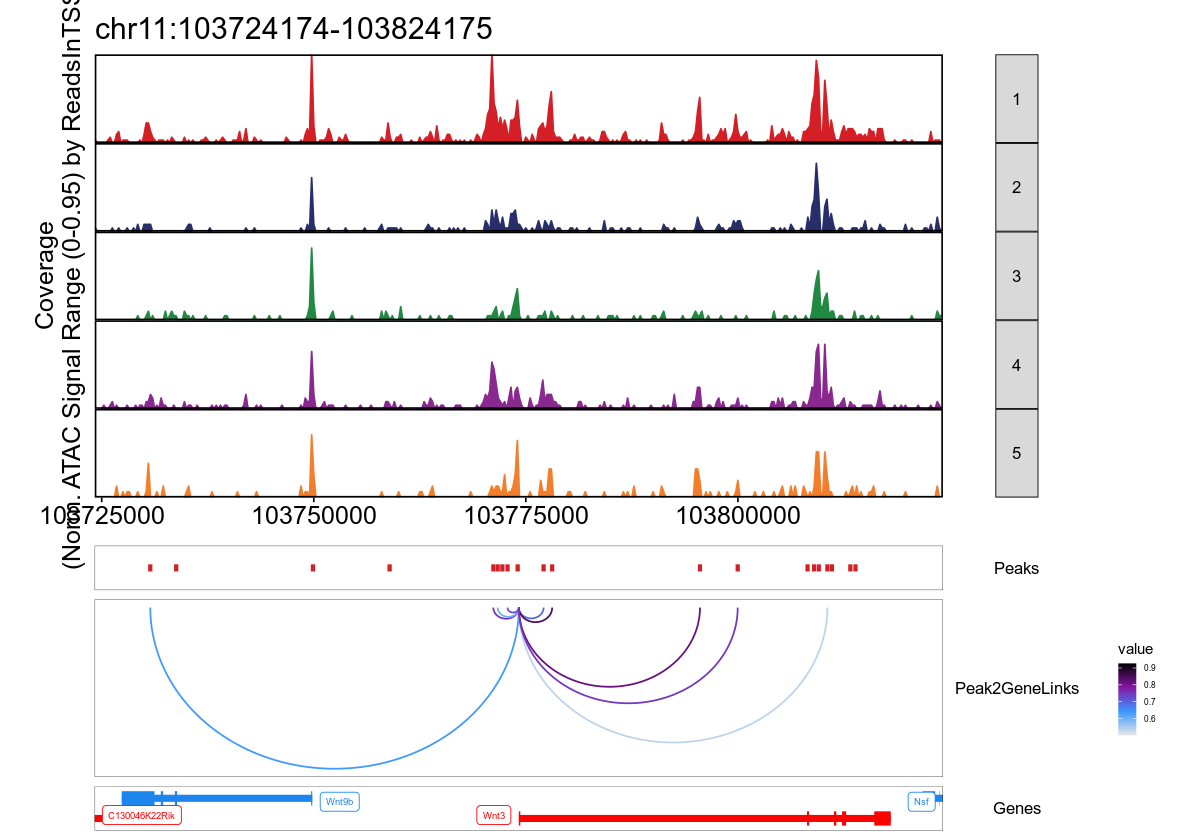

In [16]:
# Plot Nr5a1 fetal enhancer
p <- plotBrowserTrack(
    ArchRProj = Merged.proj2, 
    groupBy = "cluster", 
        geneSymbol = "Wnt3", 
    loops = getPeak2GeneLinks(Merged.proj2,
                              corCutOff = 0.5,
       FDRCutOff = 0.01,resolution = 1
                             ),
        sizes = c(5, 0.5, 2, 0.5),

  log2Norm = TRUE,

  minCells = 50,
  normMethod = "ReadsInTSS",
  ylim = NULL,
  pal = NULL,
  baseSize = 15,
  scTileSize = 0.5,
  scCellsMax = 100,
  borderWidth =2,
  tickWidth = 1,
  facetbaseSize = 10,
    
)
options(repr.plot.width=10
       )
wnt3 <- p[[1]]
grid::grid.newpage()
grid::grid.draw(p[[1]])

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-32263b6dd82e-Date-2022-10-23_Time-03-11-13.log
If there is an issue, please report to github with logFile!

2022-10-23 03:11:14 : Validating Region, 0.017 mins elapsed.

2022-10-23 03:11:14 : Adding Bulk Tracks (1 of 1), 0.017 mins elapsed.

Getting Region From Arrow Files 1 of 4

Getting Region From Arrow Files 2 of 4

Getting Region From Arrow Files 3 of 4

Getting Region From Arrow Files 4 of 4

2022-10-23 03:11:15 : Adding Feature Tracks (1 of 1), 0.045 mins elapsed.

2022-10-23 03:11:15 : Adding Loop Tracks (1 of 1), 0.047 mins elapsed.

2022-10-23 03:11:16 : Adding Gene Tracks (1 of 1), 0.051 mins elapsed.

2022-10-23 03:11:16 : Plotting, 0.055 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-32263b6dd82e-Date-2022-10-23_Time-03-11-13.log



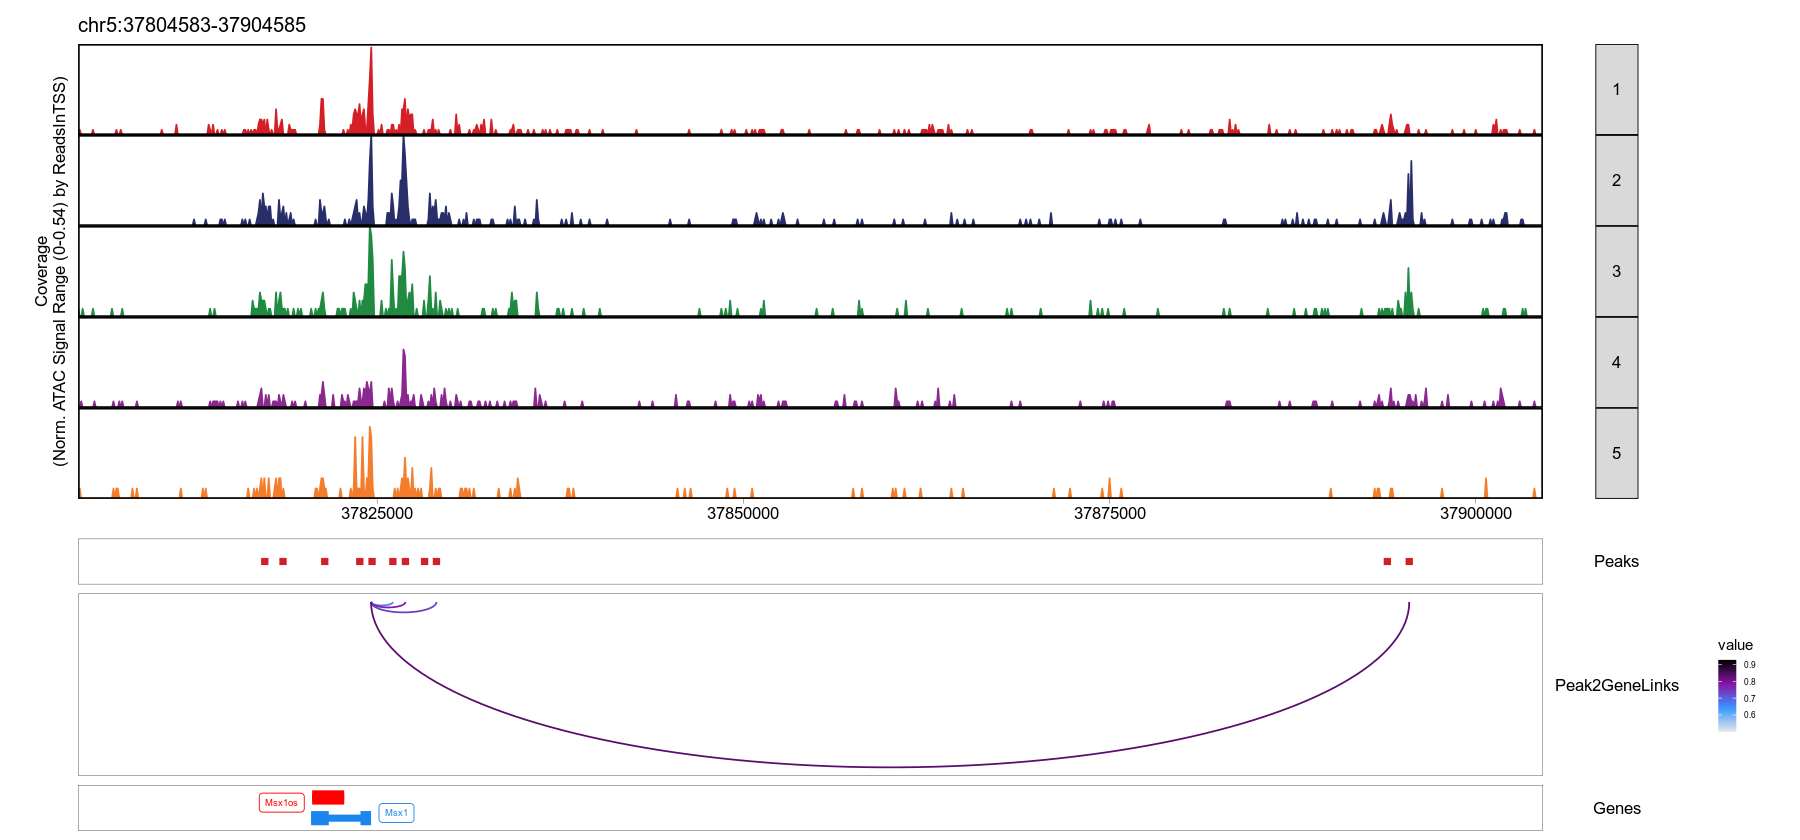

In [11]:
Msx1 <- plotBrowserTrack(
    ArchRProj = Merged.proj2, 
    groupBy = "cluster", 
#         geneSymbol = "Msx1", 
    region = c(GRanges("chr5:37804584-37904585")),
# features = GRangesList(C1 = p2g.heatmap.addtss.df %>% 
#     filter(cluster == "1") %>%
#     dplyr::select(peak) %>% separate(peak,c("chr","start","end")) %>% GRanges,
#                        C2 = p2g.heatmap.addtss.df %>% 
#     filter(cluster == "2") %>%
#     dplyr::select(peak) %>% separate(peak,c("chr","start","end")) %>% GRanges,
# #                        TrackB = ("chr2:105120673-105132509"),
#     peak =getPeakSet(Merged.proj2)),
#     upstream = 20000,
#     downstream = 20000,
         tileSize = 100,
    loops = getPeak2GeneLinks(Merged.proj2,
                              corCutOff = 0.5,
       FDRCutOff = 0.01,resolution = 1
                             ),
        sizes = c(5, 0.5, 2, 0.5),

  log2Norm = TRUE,

  minCells = 50,
  normMethod = "ReadsInTSS",
  ylim = NULL,
  pal = NULL,
  baseSize = 10,
  scTileSize = 0.5,
  scCellsMax = 100,
  borderWidth =2,
  tickWidth = 0.2,
  facetbaseSize = 10,
    
)
options(repr.plot.width=15
       )
grid::grid.newpage()
grid::grid.draw(Msx1)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-3b5b7e8338fe-Date-2022-03-25_Time-13-26-17.log
If there is an issue, please report to github with logFile!

2022-03-25 13:26:17 : Validating Region, 0.005 mins elapsed.

2022-03-25 13:26:17 : Adding Bulk Tracks (1 of 1), 0.005 mins elapsed.

Getting Region From Arrow Files 1 of 4

Getting Region From Arrow Files 2 of 4

Getting Region From Arrow Files 3 of 4

Getting Region From Arrow Files 4 of 4

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
2022-03-25 13:26:19 : Adding Feature Tracks (1 of 1), 0.024 mins elapsed.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
2022-03-25 13:26:19 : Adding Loop Tracks (1 of 1), 0.025 mins elapsed.

2022-03-25 13:26:19 : Adding Gene Tracks (1 of 1), 0.029 mins elapsed.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
2022-0

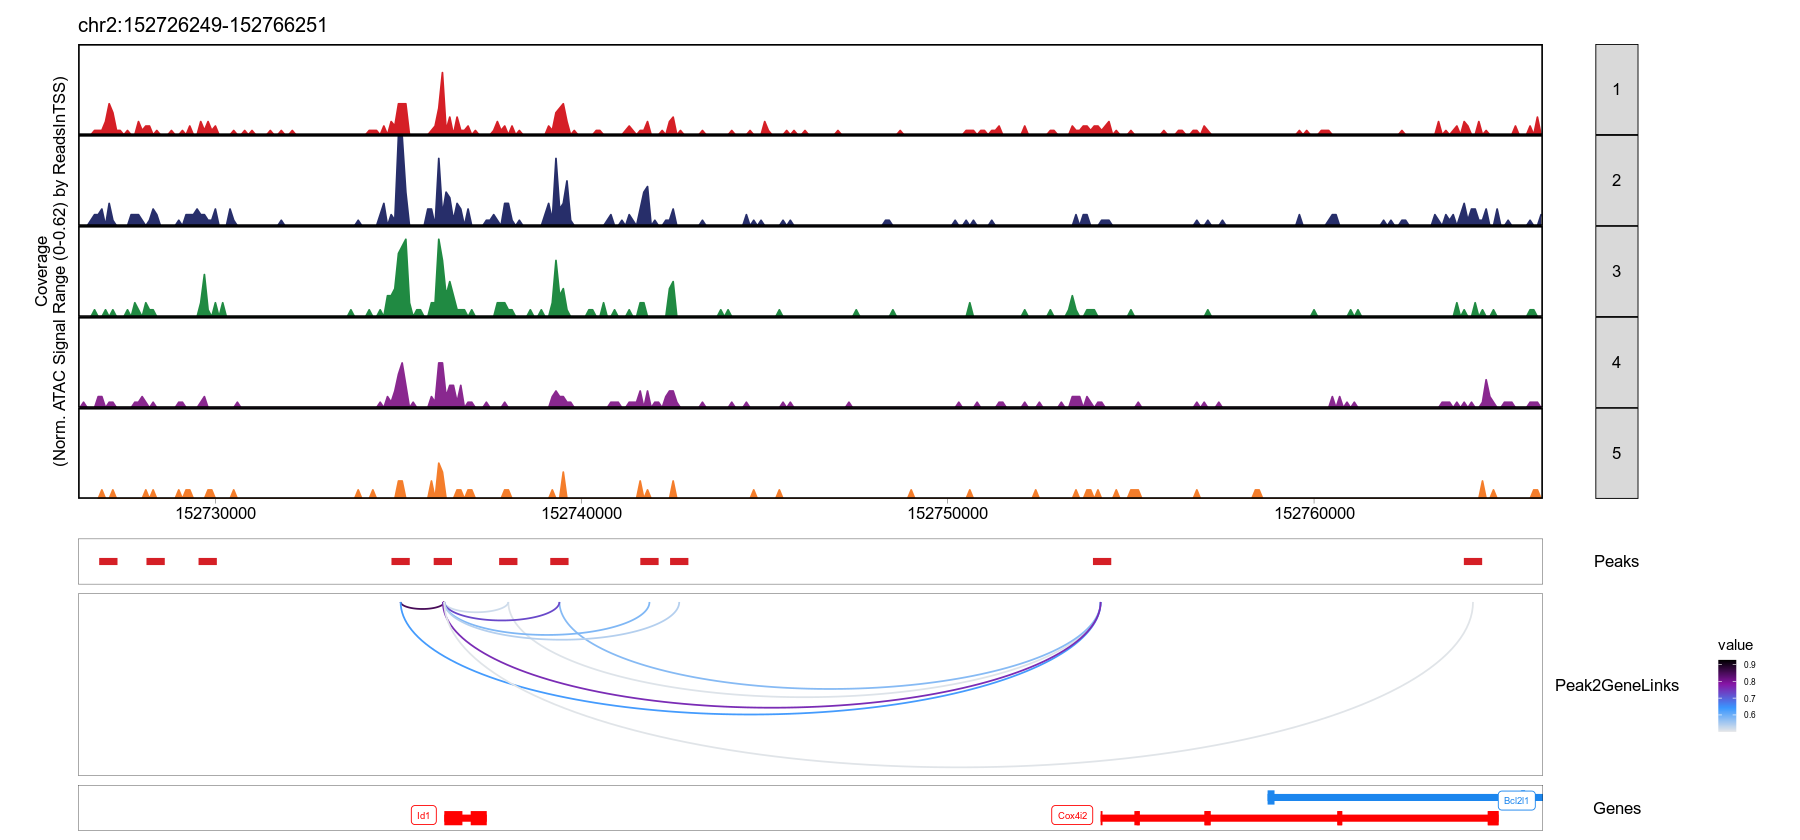

In [77]:
Id1 <- plotBrowserTrack(
    ArchRProj = Merged.proj2, 
    groupBy = "cluster", 
#         geneSymbol = "Msx1", 
    region = c(GRanges("chr2:152726250-152766251")),
# features = GRangesList(C1 = p2g.heatmap.addtss.df %>% 
#     filter(cluster == "1") %>%
#     dplyr::select(peak) %>% separate(peak,c("chr","start","end")) %>% GRanges,
#                        C2 = p2g.heatmap.addtss.df %>% 
#     filter(cluster == "2") %>%
#     dplyr::select(peak) %>% separate(peak,c("chr","start","end")) %>% GRanges,
# #                        TrackB = ("chr2:105120673-105132509"),
#     peak =getPeakSet(Merged.proj2)),
#     upstream = 20000,
#     downstream = 20000,
         tileSize = 100,
    loops = getPeak2GeneLinks(Merged.proj2,
                              corCutOff = 0.5,
       FDRCutOff = 0.01,resolution = 1
                             ),
        sizes = c(5, 0.5, 2, 0.5),

  log2Norm = TRUE,

  minCells = 50,
  normMethod = "ReadsInTSS",
  ylim = NULL,
  pal = NULL,
  baseSize = 10,
  scTileSize = 0.5,
  scCellsMax = 100,
  borderWidth =2,
  tickWidth = 0.2,
  facetbaseSize = 10,
    
)
options(repr.plot.width=15
       )
grid::grid.newpage()
grid::grid.draw(Id1)

In [97]:
pdf("./2022Figure/Germ.P2g.browser.pdf",width=20,height=10)
library(cowplot)

library(colorspace)
plot_grid(Msx1,Id1,Lefty1,wnt3)
# grid::grid.draw(p[[4]])
dev.off()


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




png 
  2

In [ ]:
C1/C2 (female)
Msx1 chr5 37804584-37904585
Id1 chr2 152726250-152766251

C4/C5 (male)
Lefty1+Lefty2 chr1:180865107-180953108

chr11:84515533-84615534

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-3b5b13be5095-Date-2022-03-25_Time-13-29-56.log
If there is an issue, please report to github with logFile!

2022-03-25 13:29:57 : Validating Region, 0.006 mins elapsed.

2022-03-25 13:29:57 : Adding Bulk Tracks (1 of 1), 0.006 mins elapsed.

Getting Region From Arrow Files 1 of 4

Getting Region From Arrow Files 2 of 4

Getting Region From Arrow Files 3 of 4

Getting Region From Arrow Files 4 of 4

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
2022-03-25 13:29:58 : Adding Feature Tracks (1 of 1), 0.024 mins elapsed.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
2022-03-25 13:29:58 : Adding Loop Tracks (1 of 1), 0.025 mins elapsed.

2022-03-25 13:29:58 : Adding Gene Tracks (1 of 1), 0.03 mins elapsed.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
2022-03

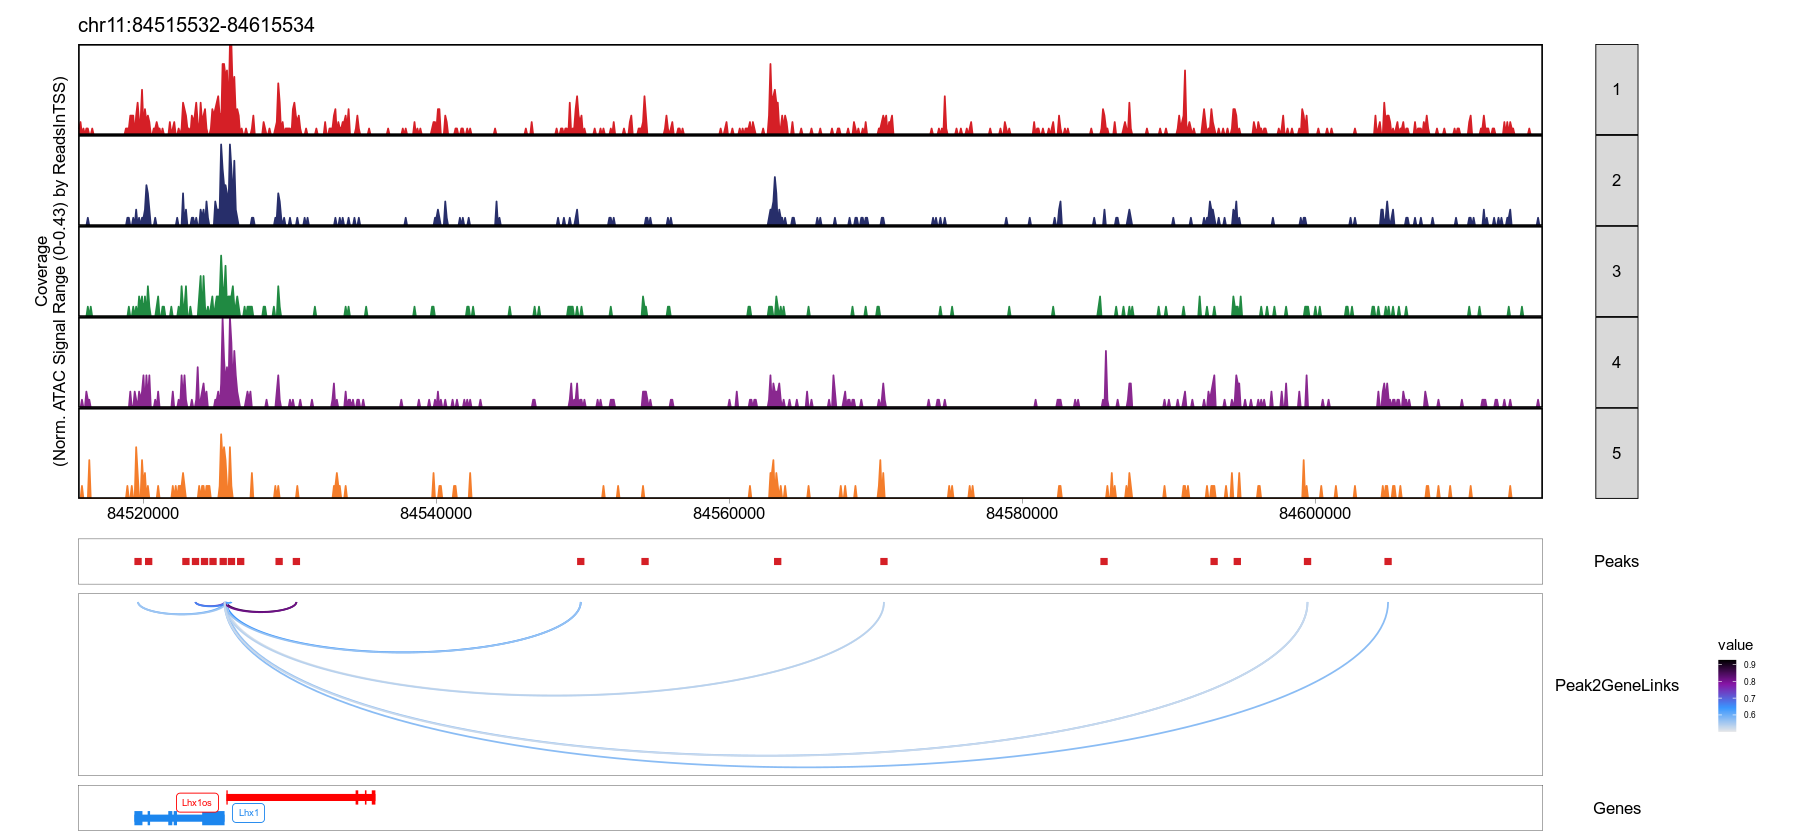

In [85]:
Lefty1 <- plotBrowserTrack(
    ArchRProj = Merged.proj2, 
    groupBy = "cluster", 
#         geneSymbol = "Msx1", 
    region = c(GRanges("chr11:84515533-84615534")),
# features = GRangesList(C1 = p2g.heatmap.addtss.df %>% 
#     filter(cluster == "1") %>%
#     dplyr::select(peak) %>% separate(peak,c("chr","start","end")) %>% GRanges,
#                        C2 = p2g.heatmap.addtss.df %>% 
#     filter(cluster == "2") %>%
#     dplyr::select(peak) %>% separate(peak,c("chr","start","end")) %>% GRanges,
# #                        TrackB = ("chr2:105120673-105132509"),
#     peak =getPeakSet(Merged.proj2)),
#     upstream = 20000,
#     downstream = 20000,
         tileSize = 100,
    loops = getPeak2GeneLinks(Merged.proj2,
                              corCutOff = 0.5,
       FDRCutOff = 0.01,resolution = 1
                              
                             ),
        sizes = c(5, 0.5, 2, 0.5),

  log2Norm = TRUE,

  minCells = 50,
  normMethod = "ReadsInTSS",
  ylim = NULL,
  pal = NULL,
  baseSize = 10,
  scTileSize = 0.5,
  scCellsMax = 100,
  borderWidth =2,
  tickWidth = 0.2,
  facetbaseSize = 10,
    
)
options(repr.plot.width=15
       )
grid::grid.newpage()
grid::grid.draw(Lefty1)